# Streamlined Data Ingestion with pandas
Before you can analyze data, you first have to acquire it. This course teaches you how to build pipelines to import data kept in common storage formats. You’ll use pandas, a major Python library for analytics, to get data from a variety of sources, from spreadsheets of survey responses, to a database of public service requests, to an API for a popular review site. Along the way, you’ll learn how to fine-tune imports to get only what you need and to address issues like incorrect data types. Finally, you’ll assemble a custom dataset from a mix of sources.

## Get data from CSVs


In [14]:
# Import pandas as pd
import pandas  as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/vt_tax_data_2016.csv')

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

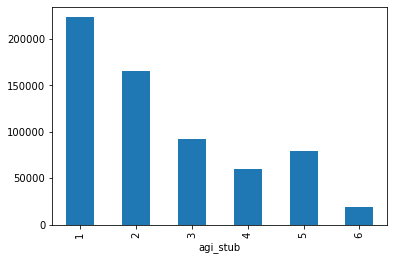

In [17]:
# Import pandas with the alias pd
import pandas as pd
import matplotlib.pyplot as plt
# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub")['N1'].sum()
counts.plot.bar()
plt.show()

# Modifying flat file imports


In [20]:
data.shape

(1476, 5)

In [19]:
# Create list of columns to use
cols = ['zipcode','agi_stub','mars1','MARS2','NUMDEP']

# Create data frame from csv using only selected columns
data = pd.read_csv("C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/vt_tax_data_2016.csv", usecols=cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


==>There is a saying that rows are cheap, but columns are expensive. Limiting datasets to only variables of interest makes them more manageable and streamlines pipelines, but make sure you aren't losing confounding data in the process.

# Import a file in chunks
When working with large files, it can be easier to load and process the data in pieces. Let's practice this workflow on the Vermont tax data.

The first 500 rows have been loaded as vt_data_first500. You'll get the next 500 rows. To do this, you'll employ several keyword arguments: nrows and skiprows to get the correct records, header to tell pandas the data does not have column names, and names to supply the missing column names. You'll also want to use the list() function to get column names from vt_data_first500 to reuse.

pandas has been imported as pd

In [ ]:
# Create data frame of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows=500,
                       		  skiprows=500,
                       		  header=None,
                       		  names=list(vt_data_first500))

# View the Vermont data frames to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

# Handling errors and missing data
##  Specify data types

In [21]:


# Print the data types
print(data.dtypes)

zipcode     int64
agi_stub    int64
mars1       int64
MARS2       int64
NUMDEP      int64
dtype: object


In [23]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {"agi_stub": "category",
			  "zipcode": str}

# Load csv using dtype to set correct data types
data = pd.read_csv("C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/vt_tax_data_2016.csv", usecols=cols, dtype=data_types)

# Print data types of resulting frame
print(data.dtypes.head())

zipcode       object
agi_stub    category
mars1          int64
MARS2          int64
NUMDEP         int64
dtype: object


# Set custom NA values
Part of data exploration and cleaning consists of checking for missing or NA values and deciding how to account for them. This is easier when missing values are treated as their own data type. and there are pandas functions that specifically target such NA values. pandas automatically treats some values as missing, but we can pass additional NA indicators with the na_values argument. Here, you'll do this to ensure that invalid ZIP codes in the Vermont tax data are coded as NA.

pandas has been imported as pd

In [25]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {"zipcode":0}
# Load csv using dtype to set correct data types
data = pd.read_csv("C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/vt_tax_data_2016.csv", usecols=cols,  na_values=null_values)
# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   zipcode  agi_stub  mars1  MARS2  NUMDEP
0      NaN         1  85090  14170   26200
1      NaN         2  51960  18820   32310
2      NaN         3  19540  22650   23610
3      NaN         4   5830  22190   18860
4      NaN         5   3900  33800   30330
5      NaN         6    600   8150    8140


==>Now that NA values are marked as such, it's possible to use NA-specific functions to do things like count missing values, as we did here, or drop records with missing values.
# Skip bad data
In this exercise you'll use read_csv() parameters to handle files with bad data, like records with more values than columns. By default, trying to import such files triggers a specific error, pandas.io.common.CParserError.

Some lines in the Vermont tax data here are corrupted. In order to load the good lines, we need to tell pandas to skip errors. We also want pandas to warn us when it skips a line so we know the scope of data issues.

pandas has been imported as pd. The exercise code will try to read the file. If there is a pandas.io.common.CParserError, the code in the except block will run.

In [26]:
try:
    # Import the CSV without any keyword arguments
    data =pd.read_csv("C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/vt_tax_data_2016.csv")
    # View first 5 records
    print(data.head())
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

In [29]:
"""Import vt_tax_data_2016_corrupt.csv with the error_bad_lines parameter set to skip bad records.

    Update the import with the warn_bad_lines parameter set to issue a warning whenever a bad record is skipped"""
try:
    # Set warn_bad_lines to issue warnings about bad records
    data = pd.read_csv("C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/vt_tax_data_2016.csv", 
                     error_bad_lines=False, 
                     warn_bad_lines=True)

    # View first 5 records
    print(data.head(2))
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  

[2 rows x 147 columns]


# Introduction to spreadsheets


# Get data from a spreadsheet
In this exercise, you'll create a data frame from a "base case" Excel file: one with a single sheet of tabular data. The fcc_survey.xlsx file here has a sample of responses from FreeCodeCamp's annual New Developer Survey. This survey asks participants about their demographics, education, work and home life, plus questions about how they're learning to code. Let's load all of it.

pandas has not been pre-loaded in this exercise, so you'll need to import it yourself before using read_excel() to load the spreadsheet.

In [32]:
# Load pandas as pd
import pandas as pd
# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/fcc-new-coder-survey.xlsx')
# View the head of the data frame
print(survey_responses.head(3))

   FreeCodeCamp New Developer Survey Responses, 2016        Unnamed: 1  \
0  Source: https://www.kaggle.com/freecodecamp/20...               NaN   
1                                                Age  AttendedBootcamp   
2                                                 28                 0   

       Unnamed: 2         Unnamed: 3    Unnamed: 4         Unnamed: 5  \
0             NaN                NaN           NaN                NaN   
1  BootcampFinish  BootcampLoanYesNo  BootcampName  BootcampRecommend   
2             NaN                NaN           NaN                NaN   

       Unnamed: 6                     Unnamed: 7            Unnamed: 8  \
0             NaN                            NaN                   NaN   
1  ChildrenNumber                 CityPopulation  CodeEventConferences   
2             NaN  between 100,000 and 1 million                   NaN   

             Unnamed: 9  ...          Unnamed: 88         Unnamed: 89  \
0                   NaN  ...            

In [34]:
# Create string of lettered columns to load
col_string = "AD, AW:BA"

# Load data with skiprows and usecols set
survey_responses = pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/fcc-new-coder-survey.xlsx', 
                                 skiprows=2, 
                                 usecols=col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


# Getting data from multiple worksheets
## Select a single sheet


Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam',
       'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup',
       'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther',
       'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWomenCode', 'CodeEventWorkshop', 'CommuteTime',
       'CountryCitizen', 'CountryLive', 'EmploymentField',
       'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther',
       'ExpectedEarning', 'FinanciallySupporting', 'Gender', 'HasChildren',
       'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet',
       'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income',
       'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev',
     

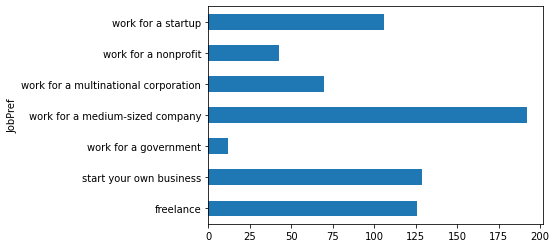

In [39]:
# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/fcc-new-coder-survey.xlsx',
                               skiprows=2,
                               sheet_name=1)
print(responses_2017.columns)
# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

In [41]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/fcc-new-coder-survey.xlsx',
                               skiprows=2,
                                sheet_name=['2016', '2017'])

# View the data type of all_survey_data
print(type(all_survey_data))

<class 'dict'>


In [42]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/fcc-new-coder-survey.xlsx',
                               skiprows=2,
                                sheet_name=None)

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys(['2016', '2017'])


Adding 1000 rows
Adding 1000 rows


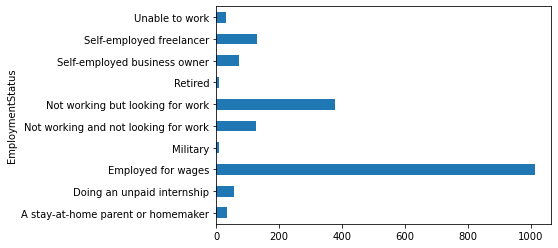

In [43]:
# Create an empty data frame
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for df in all_survey_data.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

# Modifying imports: true/false data
## Set Boolean columns


In [ ]:
# Load the data
survey_data = pd.read_excel("fcc_survey_subset.xlsx")

# Count NA values in each column
print(survey_data.isna().sum())

In [ ]:
# Set dtype to load appropriate column(s) as Boolean data
survey_data = pd.read_excel("fcc_survey_subset.xlsx",
                            dtype={"HasDebt": bool})

# View financial burdens by Boolean group
print(survey_data.groupby("HasDebt").sum())

In [ ]:
# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel("fcc_survey_yn_data.xlsx",
                              dtype={"HasDebt": bool,
                              "AttendedBootCampYesNo": bool},
                              true_values=["Yes"],
                              false_values=["No"])

# View the data
print(survey_subset.head())

# Modifying imports: parsing dates


In [44]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/fcc-new-coder-survey.xlsx',
                               skiprows=2,
                            parse_dates=['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.dtype)

datetime64[ns]


In [45]:
# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]


In [ ]:
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part2Start": ["Part2StartDate","Part2StartTime"]}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/fcc-new-coder-survey.xlsx',
                               skiprows=2,
                           parse_dates= datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())

# Parse non-standard date formats
https://strftime.org/

In [ ]:
# Parse datetimes and assign result back to Part2EndTime
survey_data["Part2EndTime"] = pd.to_datetime(survey_data["Part2EndTime"], 
                                             format="%m%d%Y %H:%M:%S")

# Introduction to databases
## Connect to a database


In [52]:
import sqlalchemy
sqlalchemy

<module 'sqlalchemy' from 'C:\\Users\\rzouga\\Anaconda3\\lib\\site-packages\\sqlalchemy\\__init__.py'>

In [53]:
# Import sqlalchemy's create_engine() function
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine("sqlite:///C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/NLP/Datacamp/data.db")

# View the tables in the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


==>Well done! sqlalchemy is a powerful library that can be used with pandas to both query databases for analysis and write results back to database tables

In [54]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine('sqlite:///data.db')

# Load hpd311calls without any SQL
hpd_calls = pd.read_sql("hpd311calls", engine)

# View the first few rows of data
print(hpd_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  
0    2786 JEROME AVENUE        07 BRONX      BRONX  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  


In [55]:
# Create the database engine
engine = create_engine("sqlite:///data.db")

# Create a SQL query to load the entire weather table
query = """
SELECT * 
  FROM weather;
"""

# Load weather with the SQL query
weather = pd.read_sql(query, engine)

# View the first few rows of data
print(weather.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


While it's convenient to load tables by name alone, using SQL queries makes it possible to fine-tune imports at the data acquisition phase of an analysis project.
# Refining imports with SQL queries


In [56]:
# Create database engine for data.db
engine = create_engine("sqlite:///data.db")

# Write query to get date, tmax, and tmin from weather
query = """
SELECT date, 
       tmax, 
       tmin
  FROM weather;
"""

# Make a data frame by passing query and engine to read_sql()
temperatures = pd.read_sql(query,engine)

# View the resulting data frame
print(temperatures)


           date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]


==>Selecting columns is useful when you only want a few columns from a table. If you want most of the columns, it may be easier to load them all and then use pandas to drop unwanted columns.

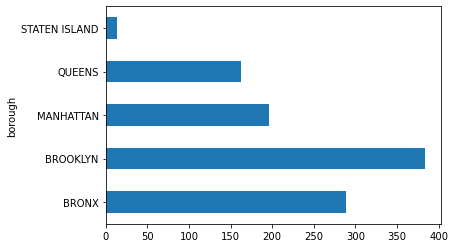

In [58]:
# Create query to get hpd311calls records about safety
query = """SELECT *
		     FROM hpd311calls
            WHERE complaint_type = 'SAFETY';"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

## Filtering on multiple conditions

In [59]:
# Create query for records with max temps <= 32 or snow >= 1
query = """
SELECT * 
  FROM weather
 WHERE tmax <= 32
    OR snow >= 1;
"""

# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query, engine)

# View summary stats about the temperatures
print(wintry_days.describe())

           latitude     longitude     elevation       awnd      prcp  \
count  2.500000e+01  2.500000e+01  2.500000e+01  25.000000  25.00000   
mean   4.077898e+01 -7.396925e+01  4.270000e+01   7.739600   0.17600   
std    2.175584e-14  4.351168e-14  1.450389e-14   2.621778   0.36947   
min    4.077898e+01 -7.396925e+01  4.270000e+01   3.130000   0.00000   
25%    4.077898e+01 -7.396925e+01  4.270000e+01   5.820000   0.00000   
50%    4.077898e+01 -7.396925e+01  4.270000e+01   7.830000   0.00000   
75%    4.077898e+01 -7.396925e+01  4.270000e+01   9.170000   0.09000   
max    4.077898e+01 -7.396925e+01  4.270000e+01  12.970000   1.41000   

            snow       tmax       tmin  
count  25.000000  25.000000  25.000000  
mean    1.332000  27.320000  17.160000  
std     2.685256   7.122266   7.673982  
min     0.000000  13.000000   5.000000  
25%     0.000000  22.000000  11.000000  
50%     0.000000  28.000000  17.000000  
75%     1.200000  31.000000  20.000000  
max     9.800000  40.00

# Getting distinct values

In [60]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough, 
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a data frame
issues_and_boros = pd.read_sql(query, engine )
# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


# Counting in groups

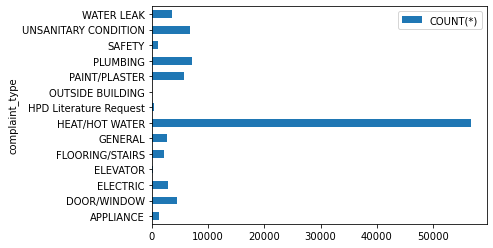

In [61]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
       COUNT(*)
  FROM hpd311calls
 GROUP BY complaint_type;
"""

# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

# Working with aggregate functions

In [65]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


# Loading multiple tables with joins
## Joining tables


In [66]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
  JOIN weather 
  ON hpd311calls.created_date = weather.date;
"""

# Create data frame of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the data frame to make sure all columns were joined
print(calls_with_weather.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough      station  \
0    2786 JEROME AVENUE        07 BRONX      BRONX  USW00094728   
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  USW00094728   
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  USW00094728   
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  USW00094728   
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  USW00094728   

                          name  ...  longitude  elevation        date  \
0  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  01/01/2018   
1  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  0

## Joining and filtering

In [67]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  where hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
print(leak_calls.head())

  unique_key created_date agency complaint_type incident_zip  \
0   38074305   01/01/2018    HPD     WATER LEAK        11212   
1   38078748   01/01/2018    HPD     WATER LEAK        10458   
2   38081097   01/01/2018    HPD     WATER LEAK        11221   
3   38077874   01/01/2018    HPD     WATER LEAK        11418   
4   38081110   01/01/2018    HPD     WATER LEAK        11420   

          incident_address community_board   borough  prcp  
0     1026 WILLMOHR STREET     17 BROOKLYN  BROOKLYN   0.0  
1       2700 MARION AVENUE        07 BRONX     BRONX   0.0  
2  192 MALCOLM X BOULEVARD     03 BROOKLYN  BROOKLYN   0.0  
3    129-11 JAMAICA AVENUE       09 QUEENS    QUEENS   0.0  
4        111-17 133 STREET       10 QUEENS    QUEENS   0.0  


In [68]:
# Query to get heat/hot water call counts by created_date
query = """
SELECT hpd311calls.created_date, 
       COUNT(*)
  FROM hpd311calls 
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
"""

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)
0   01/01/2018      4597
1   01/02/2018      4362
2   01/03/2018      3045
3   01/04/2018      3374
4   01/05/2018      4333


In [69]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date, 
       COUNT(*), 
       weather.tmax, 
       weather.tmin
  FROM hpd311calls 
       JOIN weather 
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)  tmax  tmin
0   01/01/2018      4597    19     7
1   01/02/2018      4362    26    13
2   01/03/2018      3045    30    16
3   01/04/2018      3374    29    19
4   01/05/2018      4333    19     9


# Introduction to JSON
## Load JSON data
Many open data portals make available JSONs datasets that are particularly easy to parse. They can be accessed directly via URL. Each object is a record, all objects have the same set of attributes, and none of the values are nested objects that themselves need to be parsed.

In [ ]:
# Load pandas as pd
import pandas as pd 

# Load the daily report to a data frame
pop_in_shelters = pd.read_json("dhs_daily_report.json")

# View summary stats about pop_in_shelters
print(pop_in_shelters.describe())

When getting data from a URL, like with open data portals, be mindful of how much data is being pulled and how often you do it. Requesting lots of data can strain shared resources.
##  Work with JSON orientations
JSON isn't a tabular format, so pandas makes assumptions about its orientation when loading data. Most JSON data you encounter will be in orientations that pandas can automatically transform into a data frame.

Sometimes, like in this modified version of the Department of Homeless Services Daily Report, data is oriented differently. To reduce the file size, it has been split formatted. You'll see what happens when you try to load it normally versus with the orient keyword argument. The try/except block will alert you if there are errors loading the data.

In [ ]:
try:
    # Load the JSON without keyword arguments
    df = pd.read_json("dhs_report_reformatted.json")
    # Plot total population in shelters over time
    df["date_of_census"] = pd.to_datetime(df["date_of_census"])
    df.plot(x="date_of_census", 
            y="total_individuals_in_shelter")
    plt.show()
    
except ValueError:
    print("pandas could not parse the JSON.")

In [ ]:
try:
    # Load the JSON with orient specified
    df = pd.read_json("dhs_report_reformatted.json",
                      orient='split')
    
    # Plot total population in shelters over time
    df["date_of_census"] = pd.to_datetime(df["date_of_census"])
    df.plot(x="date_of_census", 
            y="total_individuals_in_shelter")
    plt.show()
    
except ValueError:
    print("pandas could not parse the JSON.")

# Introduction to APIs

1. Introduction to APIs

You now know how to load JSON data into pandas, given a path or URL to a JSON file. In this lesson, we'll turn our attention to working with web application programming interfaces, or APIs, the most common source of JSON data.

2. Application Programming Interfaces

An application programming interface is a defined way for an application to communicate with other programs, and vice versa. They let programmers get data from an application without having to know about that application's database architecture. One caveat -- APIs are shared resources, and often limit how much data you can get in a specified timeframe. Using an API to get data is like using a catalog to order products. The catalog shows what's available and provides order instructions.

3. Application Programming Interfaces

You send a properly formed order to the right address

4. Application Programming Interfaces

and get back what you asked for. Similarly, an API provides an endpoint to send requests to, and documentation describes what a request should look like, such as parameters to include.

5. Requests

While there are Python libraries geared towards popular APIs, we'll use the Requests library in this course. Requests lets users send and get data from any URL, so it's not tied to any particular API. The function to retrieve data from a URL, logically, is requests get.


6. requests.get()

Requests get takes a string of the URL to get data from, and has optional keyword arguments that are useful for working with APIs. The params keyword lets you pass a dictionary of parameter names and values to customize API requests. The headers keyword also takes a dictionary of names and values. If the API you're using requires a user authentication key, it would be passed in the header. The result is a response object, containing data and metadata. We need to use the response's JSON method to get just the data.

7. response.json() and pandas

Importantly, the JSON method returns a dictionary, which read JSON can't parse -- it expects a string. To load the data to a data frame, we need to use pd DataFrame instead.


In [ ]:
api_url = "https://api.yelp.com/v3/businesses/search"

# Get data about NYC cafes from the Yelp API
response = requests.get(api_url, 
                headers=headers, 
                params=params)

# Extract JSON data from the response
data = response.json()

# Load data to a data frame
cafes = pd.DataFrame(data['businesses'])

# View the data's dtypes
print(cafes.dtypes)

In [ ]:
# Create dictionary to query API for cafes in NYC
parameters = {"term": "cafe",
          	  "location": "NYC"}

# Query the Yelp API with headers and params set
response = requests.get(api_url, 
                        headers=headers, 
                        params=parameters)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a data frame and print head
cafes = pd.DataFrame(data["businesses"])
print(cafes.head())

Great work! Notice that some of the values are themselves dictionaries, making them hard to analyze. We'll learn how to unpack those in a later lesson.
# Set request headers
Many APIs require users provide an API key, obtained by registering for the service. Keys typically are passed in the request header, rather than as parameters.

In [ ]:
# Create dictionary that passes Authorization and key string
headers = {"Authorization": "Bearer {}".format(api_key)}

# Query the Yelp API with headers and params set
response = requests.get(api_url, 
                        headers=headers, 
                        params=params)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a data frame and print names
cafes = pd.DataFrame(data["businesses"])
print(cafes.name)

# Working with nested JSONs
## Flatten nested JSONs
A feature of JSON data is that it can be nested: an attribute's value can consist of attribute-value pairs. This nested data is more useful unpacked, or flattened, into its own data frame columns. The pandas.io.json submodule has a function, json_normalize(), that does exactly this.

The Yelp API response data is nested. Your job is to flatten out the next level of data in the coordinates and location columns.

pandas (as pd) and requests have been imported. The results of the API call are stored as response


In [ ]:
# Load json_normalize()
from pandas.io.json import json_normalize
# Isolate the JSON data from the API response
data = response.json()
# Flatten business data into a data frame, replace separator
cafes = json_normalize(data["businesses"],
             sep='_')
# View data
print(cafes.head())

# Handle deeply nested data
Last exercise, you flattened data nested down one level. Here, you'll unpack more deeply nested data.

The categories attribute in the Yelp API response contains lists of objects. To flatten this data, you'll employ json_normalize() arguments to specify the path to categories and pick other attributes to include in the data frame. You should also change the separator to facilitate column selection and prefix the other attributes to prevent column name collisions. We'll work through this in steps.

In [ ]:
# Load other business attributes and set meta prefix
flat_cafes = json_normalize(data["businesses"],
                            sep="_",
                    		record_path="categories",
                    		meta=["name", 
                                  "alias",  
                                  "rating",
                          		  ["coordinates", "latitude"], 
                          		  ["coordinates", "longitude"]],
                    		meta_prefix="biz_")
# View the data
print(flat_cafes.head())

# Combining multiple datasets
## Append data frames
In this exercise, you’ll practice appending records by creating a dataset of the 100 highest-rated cafes in New York City according to Yelp.

APIs often limit the amount of data returned, since sending large datasets can be time- and resource-intensive. The Yelp Business Search API limits the results returned in a call to 50 records. However, the offset parameter lets a user retrieve results starting after a specified number. By modifying the offset, we can get results 1-50 in one call and 51-100 in another. Then, we can append the data frames.
pandas (as pd), requests, and json_normalize() have been imported. The 50 top-rated cafes are already in a data frame, top_50_cafes.

In [ ]:
# Add an offset parameter to get cafes 51-100
params = {"term": "cafe", 
          "location": "NYC",
          "sort_by": "rating", 
          "limit": 50,
          "offset": 50}

result = requests.get(api_url, headers=headers, params=params)
next_50_cafes = json_normalize(result.json()["businesses"])

# Append the results, setting ignore_index to renumber rows
cafes = top_50_cafes.append(next_50_cafes, ignore_index=True)

# Print shape of cafes
print(cafes.shape)

## Merge data frames

In [ ]:
# Merge crosswalk into cafes on their zip code fields
cafes_with_pumas = cafes.merge(crosswalk, 
                   			   left_on="location_zip_code", 
                               right_on="zipcode")

# Merge pop_data into cafes_with_pumas on puma field
cafes_with_pop = cafes_with_pumas.merge(pop_data, on="puma")

# View the data
print(cafes_with_pop.head())